# Chapter 8 - Modern Convolutional Neural Networks

In this chapter, most sections correspond to a significant CNN architecture that was at some point the base model upon which many research projects and deployed systems were built.

## 8.1. Deep Convolutional Neural Network (AlexNet)

Although the inputs to convolutional networks consist of raw or lightly-processed (e.g., by centering) pixel values, practitioners would never feed raw pixels into traditional models. Instead, typical computer vision pipelines consisted of manually engineering feature extraction pipelines, such as SIFT, SURF, and bags of visual words. Rather than *learning* the features, the features were *crafted*.



In [1]:
import torch
import torch.nn as nn

from d2l import torch as d2l

### 8.1.1. Representation Learning

The most important part of the pipeline was the representation. Up until 2012 the representation was calculated mostly mechanically. SIFT (Scale-Invariant Feature Transform), SURF (Speeded-Up Robust Features), HOG (Histogram of Oriented Gradients), bags of visual words, and similar feature extractors ruled the roost.

The first modern CNN, *AlexNet*, is largely an evolutionary improvement over LeNet. In the lowest layers of the network, the AlexNet model learned feature extractors that resembled some traditional filters. The figure below shows lower-level image descriptors. Higher layers in the network might build upon these representations to represent larger structures, like eyes, noses, blades of grass, etc. Even higher layers may represent whole objects like people, airplanes, dogs, or frisbees. Ultimately, the final hidden state learns a compact representation of the image that summarizes its contents such that data belonging to differnt categories can be easily separated.

![](../imgs/ch08/filters.png)

#### 8.1.1.1. Missing Ingredient: Data

Deep models with many layers require large amounts of data in order to enter the regime where they significantly outperform traditional methods based on convex optimizations (e.g., linear and kernel methods).

Modern datasets:
1. ImageNet
2. CIFAR-100
3. LARGE SCALE VISUAL RECOGNITION CHALLENGE (ILSVRC)
4. LAION-5B

#### 8.1.1.2. Missing Ingredient: Hardware

Deep learning models are voracious consumers of compute cycles. Training can take hundreds of epochs, and each iteration requires passing data through many layers of computationally expensive linear algebra operations.

GPUs are the workhorse of deep learning. They were originally designed for graphics processing, which requires performing the same computation on thousands of pixels at once. This is exactly the kind of operation we need to perform in deep learning, where we replace pixels with neurons, images with mini-batches, and model parameters with tensors.

### 8.1.2. AlexNet

AlexNet, which employs an 8-layer CNN, shows that the featurse obtained by learning can transcend manually-designed features.

The architecture of AlexNet is similar to LeNet, as shown in the figure below. The left is LeNet and the right is AlexNet.

![](../imgs/ch08/alexnet.svg)

The differences between AlexNet and LeNet are as follows:
1. AlexNet is much deeper than LeNet-5. AlexNet consists of 8 layers: 5 convolutional layers and 3 fully-connected layers.
2. AlexNet uses ReLU instead of sigmoid as the activation function.

#### 8.1.2.1. Architecture

In AlexNet's first layer, the convolution window shape is $11\times 11$. Since images in ImageNet are 8 times larger than the MNIST images.

The convolution window shape in the scond layer is reduced to %5\times 5$, followed by $3\times 3$.

After the 1st, 2nd, and 5th convolutional layers, the network adds max-pooling layers with a window shape of $3\times 3$ and a stride of 2.

AlexNet has 10 times more convolution channels than LeNet.

After the final convolutional layer, there are two huge fully connected layers with 4096 outputs. These layers require nearly 1GB model parameters.

#### 8.1.2.2. Activation Functions

The computation of the ReLU activation function is simpler. In addition, the ReLU activation function makes model training easier when using different parameter initialization methods, because of the easy gradient calculation.

#### 8.1.2.3. Capacity Control and Preprocessing

AlexNet controls the model complexity of the fully connected layer by dropout, while LeNet only uses weight decay.

To augment the data even further, the training loop of AlexNet added a great deal of image augmentation, such as flipping, clipping, and color changes.

We can implement AlexNet as follows:

In [2]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()

        self.net = nn.Sequential(
            # first convolutional block
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            # second convolutional block
            nn.LazyConv2d(256, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            # third convolutional block
            nn.LazyConv2d(384, kernel_size=3, padding=1),
            nn.ReLU(),
            # fourth convolutional block
            nn.LazyConv2d(384, kernel_size=3, padding=1),
            nn.ReLU(),
            # fifth convolutional block
            nn.LazyConv2d(256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),

            # fully connected layers
            nn.Flatten(),
            nn.LazyLinear(4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.LazyLinear(4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes)
        )

        # initialize weights
        self.net.apply(d2l.init_cnn)

We build a single-channel data example with both height and width of 224 to observe the output shape of each layer:

In [4]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

### 8.1.3. Training

To use Fashion-MNIST for AlexNet, we need to upsample the images from the original $28\times 28$ to $244\times 244$. This is generally not a smart practice, as it simply increases the computational complexity without adding information.

We perform this resizing with the `resize` argument in the `d2l.FashionMNIST` constructor.

In [5]:
# load data
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))

To train AlexNet, we need to use a smaller training rate due to the deeper and wider network, the higher image resolution, and the more costly convolutions.

In [7]:
# create model
model = AlexNet(lr=0.01, num_classes=10)
# create a trainer
trainer = d2l.Trainer(max_epochs=20, num_gpus=1)

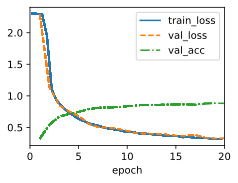

In [8]:
# train the model
trainer.fit(model, data)

AlexNet has some disadvantages when it comes to efficiency: the last two hidden layers require matrices of size $6400\times 4096$ and $4096\times 4096$, respectively. This corresponds to 164MB of memory and 81 MFLOPs of computation.

Even though the number of parameters exceeds by far the amount of training data in this experiment, there is hardly any overfitting: training and validation loss are virtually identical throughtout training. This is due to the improved regularization, such as dropout.

## 8.2. Networks Using Blocks (VGG)

The design of neural network architectures has grown progressively more abstract, with researchers moving from thinking in terms of individual neurons to whole layers, and now to blocks, repeating patterns of layers. This has now progressed to researchers using entire trained models to repurpose them for different, albeit related, tasks. Such large pretrained models are typically called *foundation models*.

The idea of using blocks first emerged from the Visual Geometry Group (VGG) at Oxford University, in their eponymously-named *VGG* network.

In [1]:
import torch
import torch.nn as nn

from d2l import torch as d2l

### 8.2.1. VGG Blocks

The basic building block of CNNs in a sequence of the following:
1. a convolutional layer with padding to maintain the resolution
2. a nonlinearity, such as a ReLU
3. a pooling layer such as max-pooling to reduce the resolution

This approach causes the spatial resolution to decrease quite rapidly and imposes a hard limit of $\log_2 d$ convolutional layers on the network before all dimensions ($d$) are used up. For example, in the case of ImageNet, it would be impossible to have more than 8 convoultional layers in this way.

The key idea of VGG network is to use *multiple* convolutions in between downsampling via max-pooling in the form of a block.

For example, the successive application of two $3\times 3$ convolutions touches the same pixels as a single $5\times 5$ convolution does. At the same time, the latter uses approximately as many parameters ($25\cdot c^2$) as three $3\times 3$ convolutions do ($3\cdot 9\cdot c^2$). VGG network also showed that *deep and narrow* networks significantly outperform their shallow counterparts.

Stacking $3\times 3$ convolutions has become a gold standard in later deep networks (a design decision only to be revisited much later in the form of *inception* blocks).

A VGG block consists of a *sequence* of convolutions with $3\times 3$ kernels with padding of 1 (keeping heihgt and width) followed by a $2\times 2$ max-pooling layer with stride of 2 (halving the resolution after each block).

We implement this block as follows:

In [2]:
def vgg_block(num_convs, out_channels):
    '''Define a VGG block
    
    Parameters
    ----------
    num_convs : int
        number of convolutional layers in the block
    out_channels : int
        number of output channels in the block

    Returns
    -------
    nn.Sequential
        a VGG block
    '''
    layers = []
    for _ in range(num_convs):
        layers.append(
            nn.LazyConv2d(out_channels, kernel_size=3, padding=1)
        )
        layers.append(nn.ReLU())

    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))

    return nn.Sequential(*layers)

### 8.2.2. VGG Network

Similar to LeNet and AlexNet, the VGG network can be partitioned into two parts:
1. the first part containing convolutional and max-pooling layers
2. the second part containing fully-connected layers

The convolutional layers in VGG are grouped in nonlinear transformations that leave the dimensionality unchanged, followed by a resolution-reduction step, as shown in the figure below.

![](../imgs/ch08/vgg.svg)

The convolutional part of the network connects several VGG blocks in succession. This grouping of convolutions is a pattern that has remained almost unchanged over the past decade.

When we implement the `VGG` class, the variable `arch` consists of a list of tuples (one per block), where each contains two values: the number of convolutional layers and the number of output channels, which are precisely the arguments required to call the `vgg_block` function. As such, VGG defines a *family* of networks rather than a single network.

In [3]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        '''Define a VGG model'''
        super().__init__()
        self.save_hyperparameters()

        # define the convolutional blocks
        conv_blocks = []
        for (num_convs, out_channels) in arch:
            conv_blocks.append(
                vgg_block(num_convs, out_channels)
            )
            
        # define the fully connected layers
        self.net = nn.Sequential(
            *conv_blocks,
            nn.Flatten(),
            nn.LazyLinear(4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.LazyLinear(4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes)
        )

        # initialize weights
        self.net.apply(d2l.init_cnn)

The original VGG network had five convolutional blocks, among which the first two have one convolutional layer each and the latter three contain two convolutional layers each. The first block has 64 output channels and each subsequent block doubles the number of output channels, until that number reaches 512. Since this network uses eight convolutional layers and three fully connected layers, it is often called VGG-11.

In [5]:
VGG(arch=(
    (1, 64), # 1st vgg block with 64 output channels
    (1, 128), # 2nd vgg block with 128 output channels
    (2, 256), # 3rd vgg block with 256 output channels
    (2, 512), # 4th vgg block with 512 output channels
    (2, 512) # 5th vgg block with 512 output channels
    )
).layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


We halve height and width at each block, finally reaching a height and width of 7 before flattening the representations for processing by the fully-connected layer.

### 8.2.3. Training

Since VGG-11 is computationally more demanding than AlexNet we construct a network with a smaller number of channels. This is more than sufficient for training on Fashion-MNIST.

In [6]:
# load data
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))

In [7]:
# create model
model = VGG(
    arch=(
        (1, 64), # 1st vgg block with 64 output channels
        (1, 128), # 2nd vgg block with 128 output channels
        (2, 256), # 3rd vgg block with 256 output channels
        (2, 512), # 4th vgg block with 512 output channels
        (2, 512) # 5th vgg block with 512 output channels
    ),
    lr=0.01,
    num_classes=10
)

# create a trainer
trainer = d2l.Trainer(max_epochs=20, num_gpus=1)

In [8]:
# train the model
trainer.fit(model, data)

More recently ParNet demonstrated that it is possible to achieve competitive performance using a much more shallow architecture through a large number of parallel computations.

## 8.3. Network in Network (NiN)

LeNet, AlexNet, and VGG all share a common design pattern: extract features exploiting *spatial* structure via a sequence of convolutions and pooling layers and post-process the representations via fully connected layers.

This design poses two major challenges:
1. the fully connected layers at the end of the architecture consume tremendous numbers of parameters.
2. it is equally impossible to add fully connected layers earlier in the network to increase the degree of nonlinearity: doing so would destroy the spatial structure and require potentially even more memory.

The *network in network* (NiN) blocks offer an alternative, capable of solving both problems in one simple strategy:
1. use $1\times 1$ convolutions to add local nonlinearities across the channel activations, and
2. use global average pooling to integrate across all locations in the last representation layer.

In [ ]:
import torch
import torch.nn as nn

from d2l import torch as d2l

### 8.3.1. NiN Blocks

Recall that the inputs and outputs of convolutional layers consist of four-dimensional tensors with axes corresponding to the `example`, `channel`, `height`, and `width`.

Also recall that the inputs and outputs of fully connected layers are typically two-dimensional tensors corresponding to the `example` and `feature`.

The idea behind NiN is to apply a fully connected layer at each pixel location (for each height and width). The resulting $1\times 1$ convolution can be thought of as a fully connected layer acting independently on each pixel location.

The figure below illustrates the main structural differences between VGG and NiN, and their blocks. Note both the difference in the NiN blocks (the initial convolution is followed by $1\times 1$ convolutions, whereas VGG retains $3\times 3$ convolutions) and at the end where we no longer require a gaint fully connected layer.

![](../imgs/ch08/nin.svg)

We now implement the NiN block as follows:

In [ ]:
def nin_block(out_channels, kernel_size, strides, padding):
    '''Define a NiN block

    Parameters
    ----------
    out_channels : int
        number of output channels in the block
    kernel_size : int
        size of the convolutional kernel
    strides : int
        stride of the convolutional kernel
    padding : int
        padding of the convolutional kernel

    Returns
    -------
    nn.Sequential
        a NiN block
    '''
    layers = [
        nn.LazyConv2d(out_channels, kernel_size, strides, padding),
        nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), # 1x1 convolution
        nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), # 1x1 convolution
        nn.ReLU()
    ]

    return nn.Sequential(*layers)

### 8.3.2. NiN Model

NiN uses the same initial convolution sizes as AlexNet. The kernel sizes are $11\times 11$, $5\times 5$, and $3\times 3$, respectively, and the numbers of output channels match those of AlexNet. Each NiN block is followed by a max-pooling layer with a stride of 2 and a window shape of $3\times 3$.

NiN uses a NiN block with a number of output channels equal to the number of label classes, followed by a *global average pooling* layer, yelding a vector of logits. This design significantly reduces the number of required model parameters, albeit at the cost of a potential increase in training time.

In [ ]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        '''Define a NiN model'''
        super().__init__()
        self.save_hyperparameters()

        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0), # 1st nin block
            nn.MaxPool2d(kernel_size=3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2), # 2nd nin block
            nn.MaxPool2d(kernel_size=3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1), # 3rd nin block
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Dropout(p=0.5),

            nin_block(num_classes, kernel_size=3, strides=1, padding=1), # last nin block
            nn.AdaptiveAvgPool2d((1, 1)), # global average pooling
            nn.Flatten() # flatten the output
        )

        # initialize weights
        self.net.apply(d2l.init_cnn)

In [ ]:
# check the output shape of each block
NiN().layer_summary((1, 1, 224, 224))

### 8.3.3. Training

In [ ]:
# load data
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))

In [ ]:
# create model
model = NiN(lr = 0.05, num_classes=10)

# create a trainer
trainer = d2l.Trainer(max_epochs=20, num_gpus=1)
# initialize weights
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)

In [ ]:
# train the model
trainer.fit(model, data)

NiN has dramatically fewer parameters than AlexNet and VGG. This stems primarily from the fact that it needs no giant fully connected layers. Instead, it uses global average pooling to aggregate across all image locations after the last stage of the network body.

Choosing fewer convolutions with wide kernels and replacing them by $1\times 1$ convolutions aids the quest for fewer parameters further. It can cater for a significant amount of nonlinearity across channels without any given location. Both $1\times 1$ convolutions and global average pooling significantly influenced subsequent designs of convolutional neural networks.

## 8.4. Multi-Branch Networks (GoogLeNet)